#### Université de Bordeaux,  Master Mention Informatique

# Analyse, classification et indexation des données: feuille 5

# Machine Learning

#### k-Nearest Neighbors 



## Exercice 1.  k-Nearest Neighbors (from scratch)

Dans ce premier exercice, nous allons coder un algorithme de classification : le $k$-nn.

On commence par importer les modules python :

- numpy : pour des calculs (algèbre linéaire, etc)
- pandas : pour la lecture des fichiers csv, etc 

In [10]:
import numpy as np
import pandas as pa

import warnings
warnings.filterwarnings("ignore")

#### Etape 1 : Distance euclidienne

1. Ecrire une fonction pour calculer la distance euclidienne entre deux points (représentés par des np.array). Attention, le tableau donné comme deuxième paramètre de la fonction contient, en dernière position, la classe de l'élément qu'il représente. Cette information n'est pas utilisée pour le calcul de distance.

In [11]:
def euclidean(point1, point2):
    # Determine the number of features to consider based on the minimum length
    num_features = min(len(point1), len(point2))
    
    # Exclure la dernière colonne (classe) pour le calcul de la distance
    features1 = point1[:num_features]
    features2 = point2[:num_features]
    
    # Calcul de la distance euclidienne
    squared_diff = np.sum((features1 - features2) ** 2)
    distance = np.sqrt(squared_diff)
    
    return distance


Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous.

In [12]:
u = np.array([1, 2, 3])
v = np.array([1, 2, 3, 1])
w = np.array([2, 3, 4, 0])
print(euclidean(u, v)) # 0.0
print(euclidean(u, w)) # 1.7320508075688772

0.0
1.7320508075688772


2. Ecrire une fonction pour calculer les distances d'un point à tous les autres points d'un dataset (matrice numpy - voir exemple)

In [13]:
def distances(point, dataset):
    # Determine the number of features based on the minimum length
    num_features = min(len(point), dataset.shape[1] - 1)
    
    # Exclude the last column (class) for distance calculation
    features = point[:num_features]
    
    # Calculate distances to all other points in the dataset
    distances = np.zeros(dataset.shape[0])
    
    for i in range(dataset.shape[0]):
        other_point = dataset[i, :num_features]
        squared_diff = np.sum((features - other_point) ** 2)
        distance = np.sqrt(squared_diff)
        distances[i] = distance
    
    return distances

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous.

In [14]:
u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 0],
                    [4, 5, 6, 0],
                    [2, 3, 4, 1],
                    [3, 4, 5, 1]])
dist = distances(u, dataset)
print(dist) # [0.0, 5.196152422706632, 1.7320508075688772, 3.4641016151377544]

[0.         5.19615242 1.73205081 3.46410162]


#### Etape 2 : Récupérer la liste des $k$ voisins les plus proches

1. Ecrire une fonction <code>voisins</code> permettant de récupérer dans un dataset la liste des $k$-voisins les plus proches d'un point donné.

In [17]:
def voisins(point, dataset, k):
    distances = [euclidean(point, data_point) for data_point in dataset]
    sorted_indices = np.argsort(distances)
    k_indices = sorted_indices[:k]
    k_voisins = [dataset[i] for i in k_indices]
    
    return k_voisins

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous. 

In [18]:
u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 0],
                    [4, 5, 6, 0],
                    [2, 3, 4, 1],
                    [3, 4, 5, 1]])

print(voisins(u, dataset, 2)) # [array([1, 2, 3, 0]), array([2, 3, 4, 1])]

[array([1, 2, 3, 0]), array([2, 3, 4, 1])]


#### Etape 3 : Faire des prédictions

1. Ecrire une fonction <code>classifier()</code> retournant la classe d'un élément $u$.

In [19]:
def classifier(u, dataset, k):
    k_nearest = voisins(u, dataset, k)
    class_labels = [point[-1] for point in k_nearest]
    class_counts = {}
    for label in class_labels:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1
    predicted_class = max(class_counts, key=class_counts.get)
    return predicted_class

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous. 

In [20]:
u = np.array([4, 5, 6])
dataset = np.array([[1, 2, 3, 0],
                   [2, 3, 4, 1],
                   [3, 4, 5, 0],
                   [4, 5, 6, 1],
                   [1, 2, 3, 0]])

print(classifier(u, dataset, 3)) # 1

1


### Exercice 2. Application

Dans cet exercice, nous allons appliquer l'algorithme écrit ci-dessus pour classifier des iris.
Pour cela, nous commençons par charger le dataset : 

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Comme indiqué dans sa description, le dataset contient, pour chaque iris, la longueur et la largeur de sa sépale et la longueur et la largeur de sa pétale. Les iris sont ensuite classifiés soit en Iris-Setosa (0), soit en Iris-Versicolour (1) ou encore en Iris-Virginica (2) :
                

<b>Indication :</b> le dataset <code>iris</code> est composé de deux parties : 
 - <code>iris.data</code> décrit les caractéristiques (features)
 - <code>iris.target</code> contient les classes

In [22]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
print(iris.data.shape)

(150, 4)


In [24]:
print(iris.target.shape)

(150,)


Pour des raisons pédagogiques, et pour se focaliser sur l'algorithme, nous avons choisi de l'implémenter pour faire de la classification binaire (c'est ce que réalisent les étapes de l'exercice 1). 

1. Ecrire l'instruction permettant de transformer le problème en un problème de classification binaire :  tous les Iris-Virginica (2) seront classés en Iris-Versicolour (1).

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target[iris.target == 2] = 1  

In [26]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


2. Afin d'utiliser l'algorithme que vous avez implémenté dans l'exercice 1, créer un tableau <code>dataset</code> dont le contenu sera des iris avec leur classes. Pour pouvoir visualiser le dataset, nous n'allons garder que les deux premières colonnes.

In [27]:
sepal_features = iris.data[:, :2]
dataset = np.column_stack((sepal_features, iris.target))

3. Visualiser le dataset

In [28]:
print(dataset)

[[5.1 3.5 0. ]
 [4.9 3.  0. ]
 [4.7 3.2 0. ]
 [4.6 3.1 0. ]
 [5.  3.6 0. ]
 [5.4 3.9 0. ]
 [4.6 3.4 0. ]
 [5.  3.4 0. ]
 [4.4 2.9 0. ]
 [4.9 3.1 0. ]
 [5.4 3.7 0. ]
 [4.8 3.4 0. ]
 [4.8 3.  0. ]
 [4.3 3.  0. ]
 [5.8 4.  0. ]
 [5.7 4.4 0. ]
 [5.4 3.9 0. ]
 [5.1 3.5 0. ]
 [5.7 3.8 0. ]
 [5.1 3.8 0. ]
 [5.4 3.4 0. ]
 [5.1 3.7 0. ]
 [4.6 3.6 0. ]
 [5.1 3.3 0. ]
 [4.8 3.4 0. ]
 [5.  3.  0. ]
 [5.  3.4 0. ]
 [5.2 3.5 0. ]
 [5.2 3.4 0. ]
 [4.7 3.2 0. ]
 [4.8 3.1 0. ]
 [5.4 3.4 0. ]
 [5.2 4.1 0. ]
 [5.5 4.2 0. ]
 [4.9 3.1 0. ]
 [5.  3.2 0. ]
 [5.5 3.5 0. ]
 [4.9 3.6 0. ]
 [4.4 3.  0. ]
 [5.1 3.4 0. ]
 [5.  3.5 0. ]
 [4.5 2.3 0. ]
 [4.4 3.2 0. ]
 [5.  3.5 0. ]
 [5.1 3.8 0. ]
 [4.8 3.  0. ]
 [5.1 3.8 0. ]
 [4.6 3.2 0. ]
 [5.3 3.7 0. ]
 [5.  3.3 0. ]
 [7.  3.2 1. ]
 [6.4 3.2 1. ]
 [6.9 3.1 1. ]
 [5.5 2.3 1. ]
 [6.5 2.8 1. ]
 [5.7 2.8 1. ]
 [6.3 3.3 1. ]
 [4.9 2.4 1. ]
 [6.6 2.9 1. ]
 [5.2 2.7 1. ]
 [5.  2.  1. ]
 [5.9 3.  1. ]
 [6.  2.2 1. ]
 [6.1 2.9 1. ]
 [5.6 2.9 1. ]
 [6.7 3.1 1. ]
 [5.6 3.  

4. Soit le vecteur $u(6.5, 2.5)$, utilisez votre algorithme avec $k=3$ pour classer $u$.

In [29]:
u = np.array([6.5, 2.5])

predicted_class = classifier(u, dataset, 3)

print("Classe prédite pour u:", predicted_class)

setosa = dataset[dataset[:, 2] == 0]
versicolour = dataset[dataset[:, 2] == 1]


Classe prédite pour u: 1.0


5. Afficher le nouveau point sur le graphique et vérifier visuellement votre résultat.

Matplotlib is building the font cache; this may take a moment.


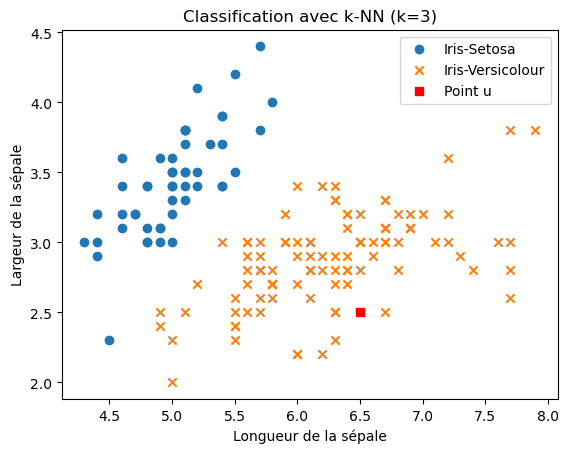

In [30]:
import matplotlib.pyplot as plt

plt.scatter(setosa[:, 0], setosa[:, 1], label='Iris-Setosa', marker='o')
plt.scatter(versicolour[:, 0], versicolour[:, 1], label='Iris-Versicolour', marker='x')
plt.scatter(u[0], u[1], label='Point u', marker='s', c='red')

plt.xlabel('Longueur de la sépale')
plt.ylabel('Largeur de la sépale')
plt.legend(loc='best')
plt.title('Classification avec k-NN (k=3)')
plt.show()

### Exercice 3 : $k$-nn avec <code>sklearn</code>

1. Charger les données, puis afficher les informations pour vérifier si le dataset ne contient pas de données manquantes.

Dans cet exercice, nous allons utiliser le classifieur $k$−nn pour apprendre à reconnaître des fruits. Pour cela, nous allons utiliser le dataset fruits disponible au format csv à l’adresse :
               
               https://www.labri.fr/~zemmari/datasets/

In [97]:
import pandas as pd
fruits_df = pd.read_csv("https://www.labri.fr/~zemmari/datasets/fruits.csv", delimiter='\t', skipinitialspace=True)


In [98]:
print(fruits_df.head())
print(fruits_df.info())

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+

2. Afficher un graphique pour visualiser les tailles (height) en fonction des largeurs (width), sans tenir compte des classes des points dans un premier temps.

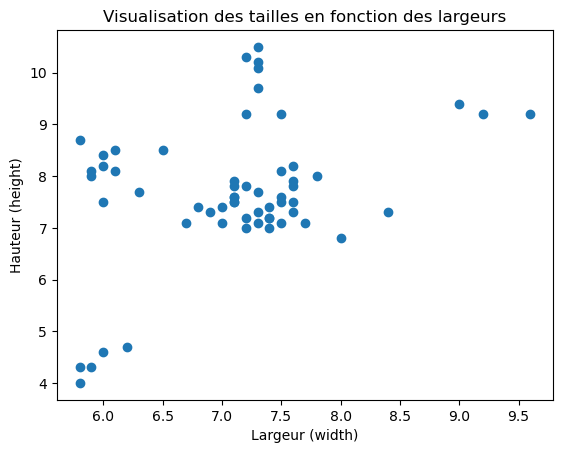

In [33]:
plt.scatter(fruits_df['width'], fruits_df['height'])
plt.xlabel('Largeur (width)')
plt.ylabel('Hauteur (height)')
plt.title('Visualisation des tailles en fonction des largeurs')
plt.show()

3. Modifier votre graphique pour qu’il affiche les points avec des couleurs différentes en fonction du
nom (<code>fruit_name</code>) du fruit. Vérifier que les classes sont assez équilibrées.

In [34]:
fruits_df.columns = ['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score']

fruit_colors = {
    'apple': 'green',
    'mandarin': 'red',
    'orange': 'orange',
    'lemon': 'yellow',
}
fruits_df['fruit_color'] = fruits_df['fruit_name'].map(fruit_colors)

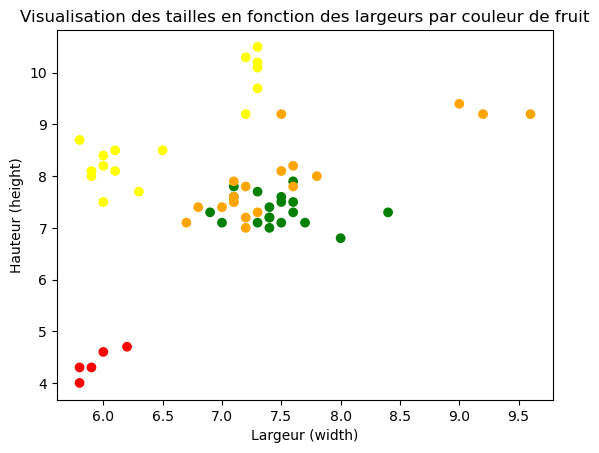

In [77]:
plt.scatter(fruits_df['width'], fruits_df['height'], c=fruits_df['fruit_color'])
plt.xlabel('Largeur (width)')
plt.ylabel('Hauteur (height)')
plt.title('Visualisation des tailles en fonction des largeurs par couleur de fruit')
plt.show()

In [78]:
fruit_counts = fruits_df['fruit_name'].value_counts()
print("Nombre d'occurrences de chaque fruit :")
print(fruit_counts)

Nombre d'occurrences de chaque fruit :
apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64


4. Définir X les données composées de la taille, la longueur et la masse des fruits, et Y les noms des
fruits.

In [79]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X_not_normalized = fruits_df[['width', 'height', 'mass']]
scaler = StandardScaler()
scaler.fit(X_not_normalized)
X = scaler.transform(X_not_normalized)
Y = fruits_df['fruit_name']
print(X)

[[ 1.59869024 -0.29139659  0.52944179]
 [ 1.10485399 -0.66192242  0.30946246]
 [ 0.36409961 -0.36550175  0.23613601]
 [-1.11740915 -2.21813091 -1.41370901]
 [-1.36432727 -2.29223608 -1.45037224]
 [-1.6112454  -2.51455158 -1.52369868]
 [-1.48778634 -2.51455158 -1.52369868]
 [-1.6112454  -2.73686708 -1.59702513]
 [-0.00627758  0.07912925  0.27279923]
 [ 0.36409961 -0.51371209  0.16280957]
 [-0.25319571 -0.29139659  0.0528199 ]
 [-0.00627758 -0.06908109  0.16280957]
 [-0.12973664 -0.43960692 -0.16715944]
 [ 0.24064055  0.00502408  0.01615667]
 [ 0.61101774 -0.29139659 -0.20382266]
 [ 0.7344768  -0.43960692 -0.13049622]
 [ 0.61101774 -0.14318625 -0.13049622]
 [ 0.48755867 -0.06908109  0.08948312]
 [ 0.48755867 -0.43960692 -0.02050655]
 [ 0.36409961 -0.36550175 -0.02050655]
 [ 0.48755867 -0.14318625 -0.05716977]
 [ 0.36409961 -0.21729142 -0.13049622]
 [ 0.24064055 -0.43960692 -0.423802  ]
 [ 0.61101774  0.15323441  0.12614634]
 [ 2.33944462  1.26481191  3.2791835 ]
 [ 2.58636275  1.11660158

5. Découper les données en deux parties : une pour l’entraînement et une pour le test.

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Taille de l'ensemble d'entraînement : ", X_train.shape, Y_train.shape)
print("Taille de l'ensemble de test : ", X_test.shape, Y_test.shape)


Taille de l'ensemble d'entraînement :  (47, 3) (47,)
Taille de l'ensemble de test :  (12, 3) (12,)


6. Entraîner un classifieur $k$−nn à reconnaître les fruits. 

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, Y_train)


KNeighborsClassifier()

7. Quelle est la valeur par défaut de $k$ ?

par default ca sera 5, soit le nombre de voisins

8. Utiliser votre jeu de test pour mesurer les performances de votre classifieur (matrice de confusion, accuracy, ...). 

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Y_pred = knn_classifier.predict(X_test)

confusion = confusion_matrix(Y_test, Y_pred)
print("Matrice de confusion :")
print(confusion)


accuracy = accuracy_score(Y_test, Y_pred)
print("Exactitude : {:.2f}".format(accuracy))

precision = precision_score(Y_test, Y_pred, average='weighted')
print("Précision : {:.2f}".format(precision))


recall = recall_score(Y_test, Y_pred, average='weighted')
print("Rappel : {:.2f}".format(recall))


f1 = f1_score(Y_test, Y_pred, average='weighted')
print("Score F1 : {:.2f}".format(f1))


Matrice de confusion :
[[2 0 0 1]
 [0 4 0 1]
 [0 0 2 0]
 [1 0 0 1]]
Exactitude : 0.75
Précision : 0.81
Rappel : 0.75
Score F1 : 0.77


value non normalisé


Matrice de confusion :
[[1 1 0 1]
 [1 2 0 2]
 [0 0 2 0]
 [0 0 0 2]]
Exactitude : 0.58
Précision : 0.64
Rappel : 0.58
Score F1 : 0.57

Value_normalisé par ligne, normalisé les vecteurs:
    
Matrice de confusion :
[[2 0 0 1]
 [0 5 0 0]
 [0 0 2 0]
 [0 0 0 2]]
Exactitude : 0.92
Précision : 0.94
Rappel : 0.92
Score F1 : 0.92

7. Quelle est la nature du fruit dont la masse, la largeur et la taille sont données respectivement par 100, 6.3 et 8? 

In [83]:

nouveau_fruit = np.array([[6.3, 8, 100]])

prediction = knn_classifier.predict(nouveau_fruit)

print(prediction)


['orange']


Before normalisation 'lemon'

8. Trouver une "bonne" valeur pour k.

In [84]:
def best_model_search(X_train, X_test, y_train, y_test, n=10, patience=3):
    k = 1
    best_acc = 0
    best_model = None
    p = patience
    while k <n and p >0 :
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        acc = np.sum(np.diag(cm))/np.sum(cm)
        print('k: ',k, '{:.2%}'.format(acc))
        if acc > best_acc:
            best_acc = acc
            best_model = knn
            p = patience + 1
        p = p -1
        k = k+1
    return best_model,k, best_acc

In [88]:
best_model, best_k, best_accuracy = best_model_search(X_train, X_test, Y_train, Y_test, n=20, patience=3)

print("Meilleur modèle trouvé avec k =", best_k)
print("Exactitude du meilleur modèle:", '{:.2%}'.format(best_accuracy))


k:  1 66.67%
k:  2 83.33%
k:  3 75.00%
k:  4 83.33%
k:  5 75.00%
Meilleur modèle trouvé avec k = 6
Exactitude du meilleur modèle: 83.33%


In [92]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)

knn_classifier.fit(X_train, Y_train)

nouveau_fruit = np.array([[6.3, 8, 100]])

prediction = knn_classifier.predict(nouveau_fruit)

print(prediction)


['orange']
